In [21]:
import matplotlib.pyplot as plt
import queue as Queue
import time
import sys

from numpy import pi
from numpy import sin
from numpy import zeros
from numpy import r_
from numpy import ones
from scipy import signal
from scipy import integrate
import threading

from numpy import mean
from numpy import power
from numpy.fft import fft
from numpy.fft import fftshift
from numpy.fft import ifft
from numpy.fft import ifftshift
import bitarray
from  scipy.io.wavfile import read as wavread
import newax25 as ax25

import multiprocessing

from math import gcd
import sounddevice as sd
import RPi.GPIO as GPIO
from functools import reduce
from numpy import ones,zeros, pi, cos, exp, sign
%matplotlib inline
from EE123TNC import TNCaprs
import zipfile

# import reedsolo
import skvideo.io  
# from skimage.transform import downscale_local_mean,resize
import scipy
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib inline

In [27]:
from JPEG import *
from scipy.ndimage.filters import gaussian_filter 
from scipy.misc import *
import lzma
from Helper_functions import *

In [28]:
video_name = "Rolling.png"
ref_video= skvideo.io.vread(video_name)
video = skvideo.io.vread(video_name)
image_stack = imageStack_load(video_name)
print(image_stack.shape)
# Tiff_play(path= 'Rolling/*.tiff', display_size=400, frame_rate=13)

(13, 42, 52, 3)


In [40]:
video_name = "Rolling.png"
ref_video= skvideo.io.vread(video_name)
video = skvideo.io.vread(video_name)
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

#Actual Data
compressed_video = []

#MetaData
meta_levels = []
wavelet = 'haar'
og_shape = 0
quantization_factor = 99
block_size = 8
shape = [int(video.shape[0])]
compressed_YCbCr = [[], [], []]
for i in range(video.shape[0]):

    frame = video[i,:,:,:]
    # LOW PASS FILTER
#     frame = gaussian_filter(frame,.5)
    # Rescale to nearest mutiple of 8
    frame =  map2multiple(frame, block_size)
    
    # break frame into blocks
    ycc_frame = rgb2ycbcr(frame)
#     ycc_breakdown = [ycc_frame[:,:,0],imresize(ycc_frame[:,:,1],.5),imresize(ycc_frame[:,:,2],.5)]

    ycc_breakdown = [ycc_frame[:,:,0],ycc_frame[:,:,1],ycc_frame[:,:,2]]
    og_shape = ycc_frame.shape
    for k in range(len(ycc_breakdown)):
        vertical_stack = []
        for x in range(frame.shape[0] // block_size):
            horizontal_stack = []
            for y in range(frame.shape[1] // block_size):
                block = ycc_frame[x * block_size:(x+1) * block_size, y * block_size:(y+1) * block_size, k]
                if (x == 0 and y ==0 and k == 2 and i == 0):
                    print(block)
#                 level = wavelet_level(block, wavelet)
                level = 3
#                 print(level)
#                 print("channel", ycc_breakdown[k].shape)
                dwt = dwt2(block, level=level, wavelet=wavelet)
                
#                 print("dwt", dwt.shape)
                dwt= thresh_dwt(dwt, f=.15)
                quantized_dwt = quantize(k, dwt, quantization_factor)
#                 print("quantized", quatized_dwt.shape)
                
                if (x == 0 and y ==0 and k == 2 and i == 0):
                    print(quantized_dwt)
                horizontal_stack.append(zigzag_block(quantized_dwt))

            horizontal_stack = np.hstack(horizontal_stack)
            vertical_stack.append(horizontal_stack)
        vertical_stack = np.hstack(vertical_stack)
        compressed_YCbCr[k].append(vertical_stack)
for i in range(3):
    compressed_YCbCr[i] = np.hstack(compressed_YCbCr[i])
shape += [int(frame.shape[0]), int(frame.shape[1])]
parameters = np.array([compressed_YCbCr[0].shape[0], compressed_YCbCr[1].shape[0], shape[0], shape[1], shape[2], block_size, quantization_factor], dtype = int)
array = np.hstack([parameters, compressed_YCbCr[0], compressed_YCbCr[1], compressed_YCbCr[2]])
print(len(video.tobytes()))
print(len(array.tobytes()))
print(min(array))
print(array.shape)
with lzma.open(video_name + ".xz","w") as f:
    f.write(array.tobytes())


    

[[122 122 122 122 122 122 122 122]
 [122 122 122 122 122 122 122 122]
 [122 122 122 122 122 122 122 122]
 [122 122 122 122 122 122 122 122]
 [122 122 122 122 122 122 122 122]
 [122 122 122 122 122 122 122 122]
 [122 122 122 122 122 122 122 122]
 [122 122 122 122 122 123 122 128]]
[[2873    0    0    0    0    0    0    0]
 [  -3    0    0   -2    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0   -1    0    0    0    0    0   -2]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0   -2    0    0    0    1]]
85176
419356
-2360
(104839,)


[13, 48, 56]
[[2873    0    0    0    0    0    0    0]
 [  -3    0    0   -2    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0   -1    0    0    0    0    0   -2]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0   -2    0    0    0    1]]
[[ 121.9675  121.9675  121.9675  121.9675  122.2375  122.2375  122.2375
   122.2375]
 [ 121.9675  121.9675  121.9675  121.9675  122.2375  122.2375  122.2375
   122.2375]
 [ 121.9675  121.9675  121.9675  121.9675  122.2375  122.2375  122.2375
   122.2375]
 [ 121.9675  121.9675  121.9675  121.9675  122.2375  122.2375  122.2375
   122.2375]
 [ 121.9675  121.9675  121.9675  121.9675  121.2475  121.2475  121.9075
   121.9075]
 [ 121.9675  121.9675  121.9675  121.9675  121.2475  121.2475  121.9075
   121.9075]
 [ 121.9675  121.9675  121.9675  121.9675  122.5675  122.5675  120.2575
   122.2375]
 [ 121.9675  121.9675  121.9675  121.9675  122.

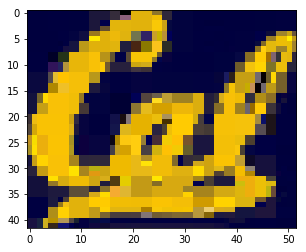

In [41]:
# with lzma.open("video_data.xz") as f:
#     file_content = f.read()
# data = np.frombuffer(file_content, dtype=np.uint8)
# print(len(data))
# shift = data[0]
# ind = int(data[1] * 2**8 + data[2])+3
# Y = data[3:ind].reshape(13,64,64,1)
# cc = data[ind:].reshape(13,32,32,2)

with lzma.open(video_name + ".xz") as f:
    file_content = f.read()
data = np.frombuffer(file_content, dtype=int)
num_of_parameters = 7
ind_Y = int(data[0]) + num_of_parameters
ind_Cb = int(data[0] + data[1]) + num_of_parameters
video_shape = [int(data[2]), int(data[3]), int(data[4])]
block_size = int(data[5])
quantization_factor = int(data[6])
compressed_YCbCr = [[], [], []]
compressed_YCbCr[0] = data[num_of_parameters : ind_Y]
compressed_YCbCr[1] = data[ind_Y : ind_Cb]
compressed_YCbCr[2] = data[ind_Cb:]
wavelet = 'haar'
received_video = [[], [], []]

ind = [0, 0, 0]
print(video_shape)
for i in range(video_shape[0]):
    for k in range(3):
        vertical_stack = []
        for x in range(video_shape[1] // block_size):
            horizontal_stack = []
            for y in range(video_shape[2] // block_size):
#                 print(k, len(compressed_YCbCr[k]))
                dwt = unzigzag_block(compressed_YCbCr[k][ind[k]:ind[k]+block_size * block_size])
                if (x == 0 and y ==0 and k == 2 and i == 0):
                    print(dwt)
                level = 3
                dwt = dequantize(k, dwt, quantization_factor)
                block = idwt2(dwt, level, wavelet=wavelet)
    
                if (x == 0 and y ==0 and k == 2 and i == 0):
                    print(block)
                ind[k] += block_size * block_size
                horizontal_stack.append(block)

            horizontal_stack = np.hstack(horizontal_stack)
            vertical_stack.append(horizontal_stack)
        vertical_stack = np.vstack(vertical_stack)
        received_video[k].append(vertical_stack)

rec_rgb = []
ycbcr = np.zeros(video_shape + [3], dtype = int)
for k in range(video_shape[0]):
    for i in range(video_shape[1]):
        for j in range(video_shape[2]):
            for t in range(3):
                ycbcr[k, i, j, t] = received_video[t][k][i][j]
for k in range(video_shape[0]):
    rec_rgb.append(ycbcr2rgb(ycbcr[k, :, :, :])[:42, :52, :])
#     rec_rgb.append(ycbcr2rgb(ycbcr[k, :, :, :]))
# # rec_rgb = YCbCr2rgb(rec_video[0])

plt.imshow(rec_rgb[0])
skvideo.io.vwrite("transmittedRolling.mov", rec_rgb)

In [42]:
video_name = "transmittedRolling.mov"
video = skvideo.io.vread(video_name)
from Helper_functions import *
image_stack = imageStack_load(video_name)
print(image_stack.shape)
def psnr(ref, meas, maxVal=255):
    assert np.shape(ref) == np.shape(meas), "Test video must match measured vidoe dimensions"


    dif = (ref.astype(float)-meas.astype(float)).ravel()
    mse = np.linalg.norm(dif)**2/np.prod(np.shape(ref))
    psnr = 10*np.log10(maxVal**2.0/mse)
    return psnr
print(psnr(ref_video, video))
# Tiff_play(path= 'transmittedRolling/*.tiff', display_size=400, frame_rate=13)

(13, 42, 52, 3)
19.2985424717
